In [1]:
# Read dataset
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6000 non-null   object 
 1   Rented Bike Count          6000 non-null   int64  
 2   Hour                       6000 non-null   int64  
 3   Temperature(°C)            6000 non-null   float64
 4   Humidity(%)                6000 non-null   int64  
 5   Wind speed (m/s)           6000 non-null   float64
 6   Visibility (10m)           6000 non-null   int64  
 7   Dew point temperature(°C)  6000 non-null   float64
 8   Solar Radiation (MJ/m2)    6000 non-null   float64
 9   Rainfall(mm)               6000 non-null   float64
 10  Snowfall (cm)              6000 non-null   float64
 11  Seasons                    6000 non-null   object 
 12  Holiday                    6000 non-null   object 
 13  Functioning Day            6000 non-null   objec

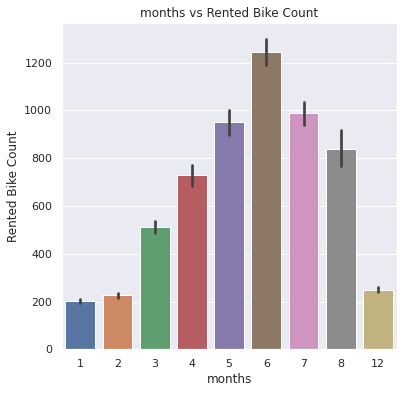

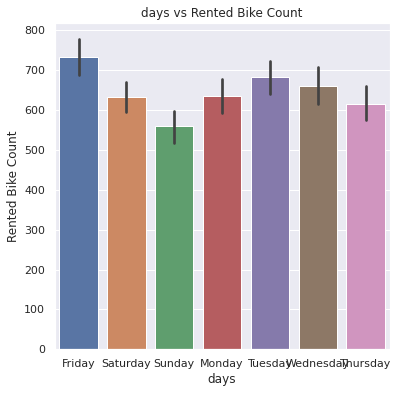

9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6000 non-null   datetime64[ns]
 1   Rented Bike Count          6000 non-null   int64         
 2   Hour                       6000 non-null   int64         
 3   Temperature(°C)            6000 non-null   float64       
 4   Humidity(%)                6000 non-null   int64         
 5   Wind speed (m/s)           6000 non-null   float64       
 6   Visibility (10m)           6000 non-null   int64         
 7   Dew point temperature(°C)  6000 non-null   float64       
 8   Solar Radiation (MJ/m2)    6000 non-null   float64       
 9   Rainfall(mm)               6000 non-null   float64       
 10  Snowfall (cm)              6000 non-null   float64       
 11  Seasons                    6000 non-null   object        
 12  Holi

In [3]:
#Date column
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
def date_col(train):
  train['Date']=pd.to_datetime(train['Date'],format="%d/%m/%Y")
  train['months']=train['Date'].dt.month
  train['days']=train['Date'].dt.day_name()
date_col(train)
fig = plt.figure(figsize=(6,6))
sns.barplot(x='months',y='Rented Bike Count',data=train)
plt.title('months vs Rented Bike Count')
plt.show()
fig = plt.figure(figsize=(6,6))
sns.barplot(x='days',y='Rented Bike Count',data=train)
plt.title('days vs Rented Bike Count')
plt.show()
print(train['months'].nunique())
train.info()


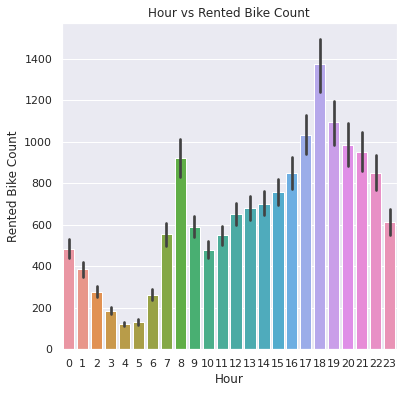

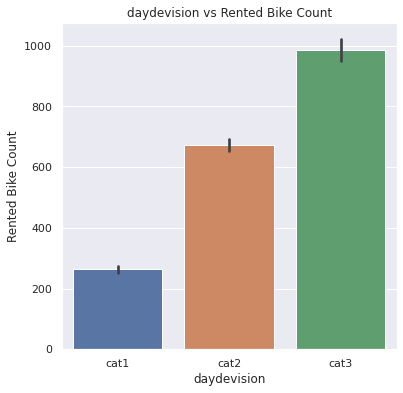

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   
5 2017-12-01                100     5             -6.4           37   
6 2017-12-01                181     6             -6.6           35   
7 2017-12-01                460     7             -7.4           38   
8 2017-12-01                930     8             -7.6           37   
9 2017-12-01                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2             

In [4]:
# hour column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=train)
plt.title('Hour vs Rented Bike Count')
plt.show()
def hour_col(train):
  def devcond(x):
    if x<7:
      return "cat1"
    elif x>16:
      return "cat3"
    else:
      return "cat2"
  train['daydevision']=train['Hour'].apply(devcond)
hour_col(train)
fig = plt.figure(figsize=(6,6))
sns.barplot(x='daydevision',y='Rented Bike Count',data=train)
plt.title('daydevision vs Rented Bike Count')
plt.show()
print(train.head(10))
train.info()


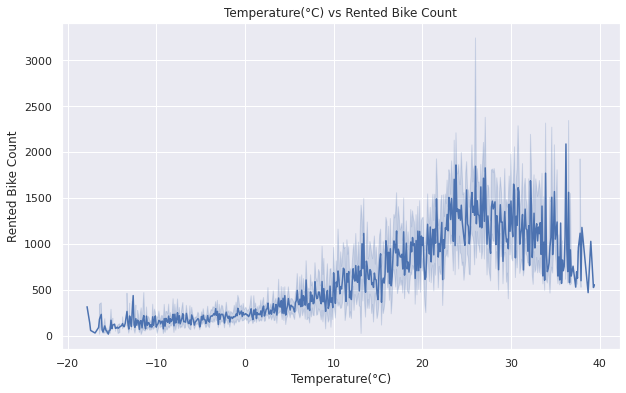

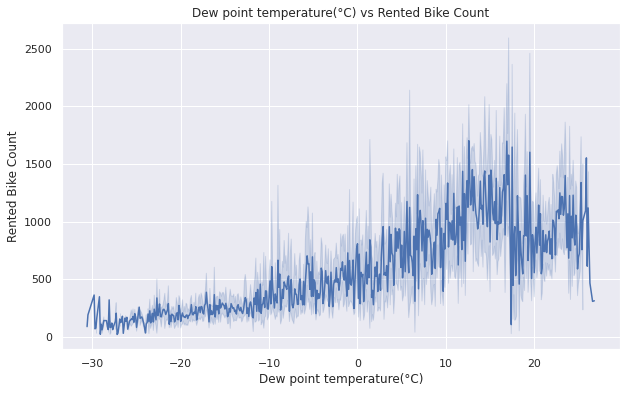

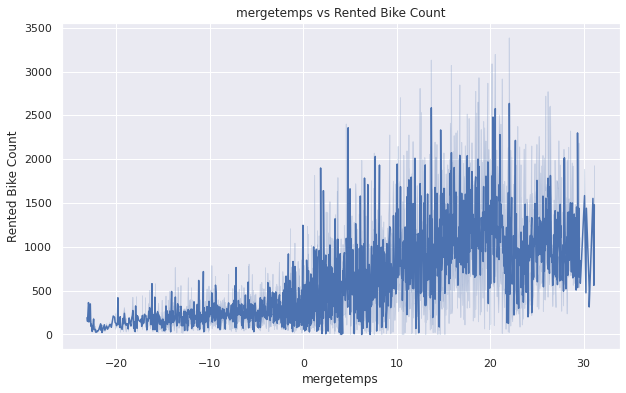

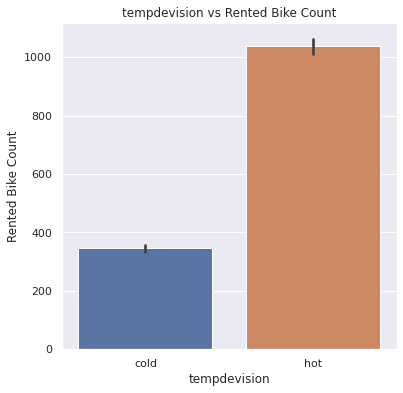

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1     

In [6]:
# temprature column
def temp_col(train):
  train['mergetemps']=(train['Dew point temperature(°C)']+train['Temperature(°C)'])/2
  def devcond(x):
    if x<10:
      return "cold"
    else:
      return "hot"
  train['tempdevision']=train['mergetemps'].apply(devcond)
temp_col(train)
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=train)
plt.title('Temperature(°C) vs Rented Bike Count')
plt.show()
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Dew point temperature(°C)',y='Rented Bike Count',data=train)
plt.title('Dew point temperature(°C) vs Rented Bike Count')
plt.show()
# merge result of two columns

fig = plt.figure(figsize=(10,6))
sns.lineplot(x='mergetemps',y='Rented Bike Count',data=train)
plt.title('mergetemps vs Rented Bike Count')
plt.show()
# we can devide temps into hot and cold days

fig = plt.figure(figsize=(6,6))
sns.barplot(x='tempdevision',y='Rented Bike Count',data=train)
plt.title('tempdevision vs Rented Bike Count')
plt.show()
print(train.head(5))

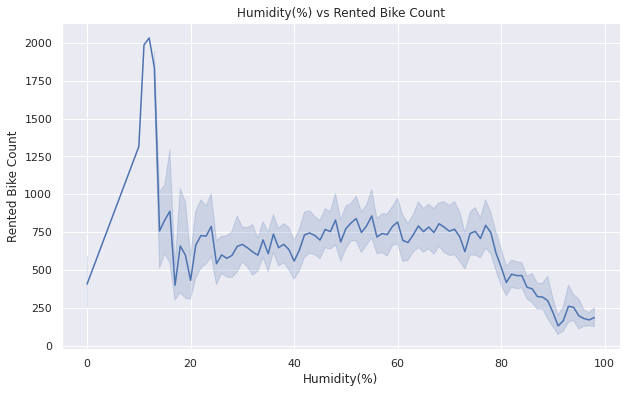

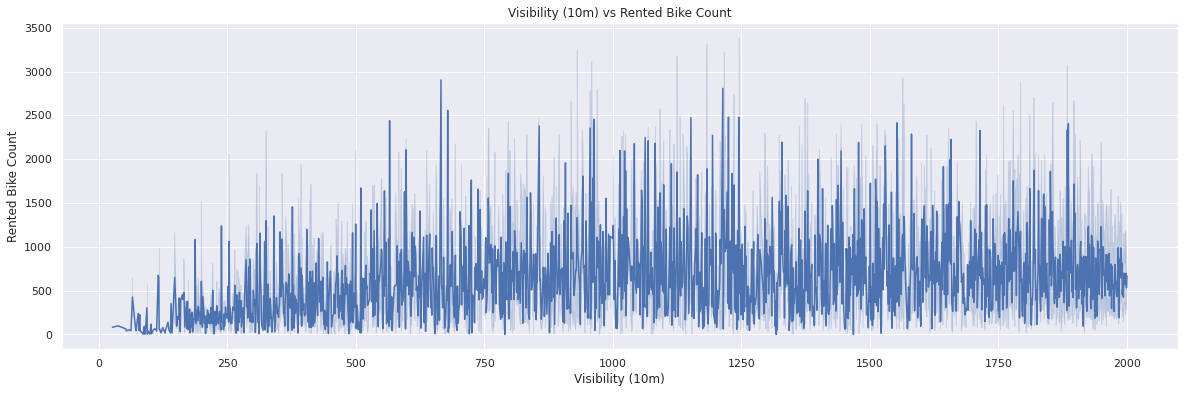

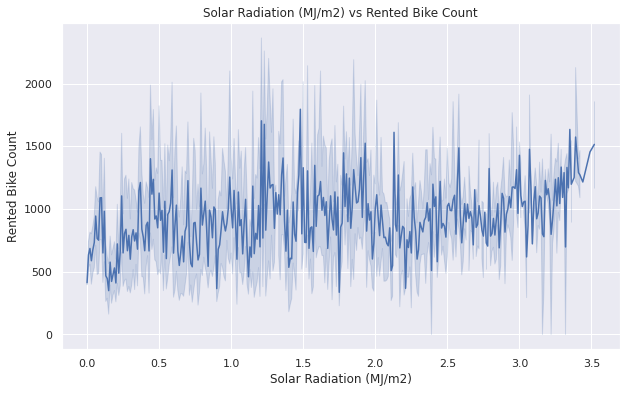

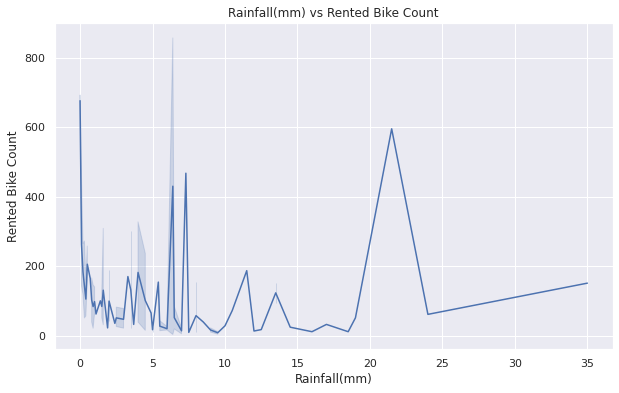

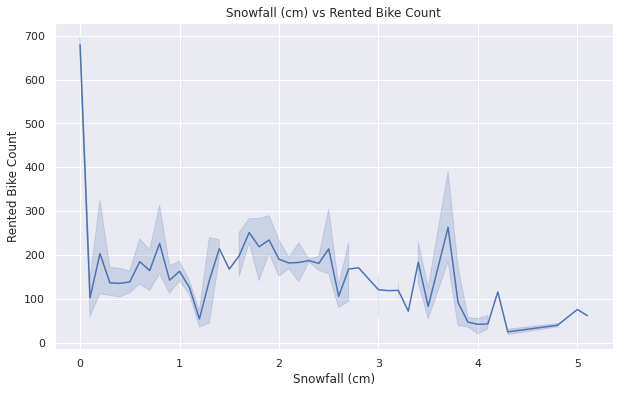

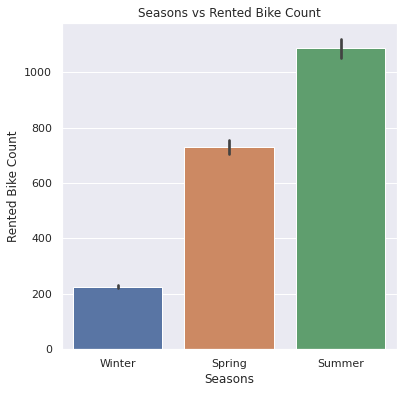

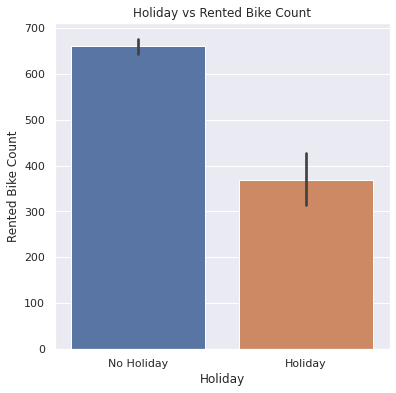

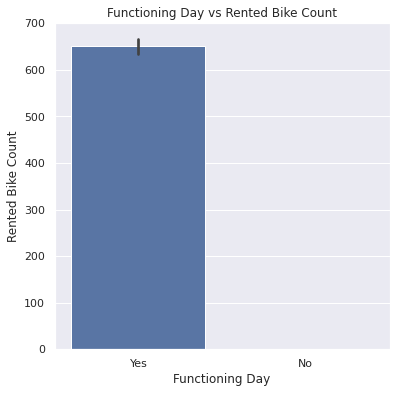

In [ ]:
#Humidity(%) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Humidity(%)',y='Rented Bike Count',data=train)
plt.title('Humidity(%) vs Rented Bike Count')
plt.show()
#Visibility (10m) column
fig = plt.figure(figsize=(20,6))
sns.lineplot(x='Visibility (10m)',y='Rented Bike Count',data=train)
plt.title('Visibility (10m) vs Rented Bike Count')
plt.show()
#Solar Radiation (MJ/m2) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=train)
plt.title('Solar Radiation (MJ/m2) vs Rented Bike Count')
plt.show()
#Rainfall(mm) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=train)
plt.title('Rainfall(mm) vs Rented Bike Count')
plt.show()
#Snowfall (cm) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=train)
plt.title('Snowfall (cm) vs Rented Bike Count')
plt.show()
#Seasons (cm) column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Seasons',y='Rented Bike Count',data=train)
plt.title('Seasons vs Rented Bike Count')
plt.show()
#Holiday (cm) column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Holiday',y='Rented Bike Count',data=train)
plt.title('Holiday vs Rented Bike Count')
plt.show()
#Functioning Day (cm) column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=train)
plt.title('Functioning Day vs Rented Bike Count')
plt.show()
#scaling numerical columns and one hot encoding categorical columns

In [9]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.5 MB/s 


In [13]:
#preprocessing
import category_encoders as catenc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
used_feats=[i for i in train.columns if i not in (['Date','Rented Bike Count','mergetemps','Dew point temperature(°C)'])]
#prepare test
date_col(test)
temp_col(test)
hour_col(test)
#merge test and train to encode categorical features
features_train=train[used_feats]
features_test=test[used_feats]
merged_df=pd.concat((features_train,features_test),axis=0)
encode_features=['months','daydevision','tempdevision','Seasons','Holiday','Functioning Day','days']
encoder=catenc.OneHotEncoder(cols=encode_features,use_cat_names=True)
merged_df=encoder.fit_transform(merged_df)
print(merged_df.info())
X=merged_df.iloc[:6000,:]
xtest=merged_df.iloc[6000:,:]
print(X.shape,xtest.shape)
y=np.log1p(train['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2759
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Seasons_Winter           8760 non-null   int64  
 9   Seasons_Spring           8760 non-null   int64  
 10  Seasons_Summer           8760 non-null   int64  
 11  Seasons_Autumn           8760 non-null   int64  
 12  Holiday_No Holiday       8760 non-null   int64  
 13  Holiday_Holiday          8760 non-null   int64  
 14  Functioning Day_Yes     

In [14]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [30]:
from catboost import CatBoostRegressor
catb=CatBoostRegressor(iterations=3000,max_depth=10,learning_rate=0.1,l2_leaf_reg=10,verbose=True,loss_function='RMSE')
catb.fit(X_train, y_train,eval_set=(X_test,y_test))

import pickle
pickle.dump(catb, open("/content/catboostmodel.sav", 'wb'))

0:	learn: 1.2092889	test: 1.2404336	best: 1.2404336 (0)	total: 21.9ms	remaining: 1m 5s
1:	learn: 1.1352648	test: 1.1664724	best: 1.1664724 (1)	total: 41.3ms	remaining: 1m 1s
2:	learn: 1.0734159	test: 1.1048926	best: 1.1048926 (2)	total: 60.3ms	remaining: 1m
3:	learn: 1.0185853	test: 1.0512438	best: 1.0512438 (3)	total: 72.6ms	remaining: 54.4s
4:	learn: 0.9643073	test: 0.9960562	best: 0.9960562 (4)	total: 96.1ms	remaining: 57.5s
5:	learn: 0.9148560	test: 0.9480667	best: 0.9480667 (5)	total: 125ms	remaining: 1m 2s
6:	learn: 0.8734915	test: 0.9058717	best: 0.9058717 (6)	total: 136ms	remaining: 58.1s
7:	learn: 0.8339958	test: 0.8674958	best: 0.8674958 (7)	total: 156ms	remaining: 58.4s
8:	learn: 0.7984614	test: 0.8325206	best: 0.8325206 (8)	total: 179ms	remaining: 59.6s
9:	learn: 0.7696904	test: 0.8033096	best: 0.8033096 (9)	total: 199ms	remaining: 59.4s
10:	learn: 0.7388868	test: 0.7717954	best: 0.7717954 (10)	total: 222ms	remaining: 1m
11:	learn: 0.7148991	test: 0.7494246	best: 0.7494246 

In [32]:
#submitions
sub=pd.DataFrame(columns=['ID','Rented Bike Count'])
sub['ID']=test['ID']
predic=catb.predict(xtest)
predic=np.expm1(predic)
predic=np.round(predic)
for i in predic:
  print(i)
sub['Rented Bike Count']=predic
sub.to_csv("submisions.csv",index=False)

920.0
641.0
438.0
340.0
222.0
291.0
578.0
1074.0
1424.0
809.0
586.0
614.0
627.0
604.0
708.0
622.0
714.0
1014.0
1955.0
1849.0
1725.0
1844.0
1585.0
1193.0
896.0
720.0
469.0
320.0
212.0
271.0
494.0
1125.0
1613.0
948.0
649.0
706.0
743.0
369.0
676.0
794.0
766.0
240.0
490.0
1247.0
1469.0
1353.0
1266.0
1083.0
981.0
813.0
544.0
375.0
249.0
303.0
562.0
1222.0
1829.0
931.0
648.0
660.0
636.0
606.0
642.0
682.0
675.0
1022.0
1749.0
1564.0
1440.0
1504.0
1413.0
1084.0
968.0
859.0
634.0
431.0
287.0
244.0
301.0
451.0
722.0
691.0
626.0
655.0
671.0
684.0
666.0
768.0
692.0
949.0
1192.0
1238.0
1159.0
1328.0
1247.0
1005.0
896.0
652.0
434.0
328.0
229.0
196.0
226.0
352.0
528.0
569.0
473.0
518.0
573.0
652.0
616.0
724.0
811.0
1130.0
1352.0
300.0
182.0
1123.0
1317.0
938.0
709.0
193.0
329.0
213.0
160.0
224.0
427.0
1045.0
1725.0
748.0
583.0
607.0
600.0
655.0
670.0
754.0
833.0
1282.0
1958.0
1876.0
1642.0
1424.0
1327.0
1086.0
831.0
640.0
430.0
301.0
212.0
284.0
564.0
1126.0
1630.0
875.0
593.0
659.0
651.0
551.0
575.0
